paramter tuning: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

# XGBOOST REGRESSOR

In [2]:
!pip install xgboost

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Read in the csv
df=pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Real estate.csv', encoding='utf-8')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


learning rate goes between 0 and 1. 

In [3]:
param_grid = {
    'silent': [1],
    'max_depth': [4,5,6,7],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3,0.5,0.7,1],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [100]}

In [4]:
X = df[['X2 house age','X3 distance to the nearest MRT station']]
y = df['Y house price of unit area']

In [5]:
##### Step 1 - Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [7]:
xgb_model = regressor.fit(X_train, y_train)

In [8]:
y_pred = regressor.predict(X_test)

In [9]:
# Calculate the absolute errors
errors_best_model = abs(y_pred - y_test)

In [10]:
import numpy as np

In [11]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_best_model), 2), 'degrees.')

Mean Absolute Error: 5.44 degrees.


In [12]:
# Calculate mean absolute percentage error (MAPE). MAPE the lower the better for the model. 
mape = 100 * (errors_best_model / y_test)

In [13]:
mape

356     7.888649
170    11.529178
224     5.588507
331    23.670774
306    29.117947
         ...    
308     6.861194
100    17.181669
7      20.157434
22      6.597370
68     12.542895
Name: Y house price of unit area, Length: 83, dtype: float64

In [14]:
#caulcate a display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 84.75 %.


In [15]:
param_grid_2 = {
    'silent': [1],
    'max_depth': [4,5,6,7],
    'learning_rate': [0.001,0.5,0.7,1],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0],
    'alpha': [0.1, 1.0, 5.0],
    'n_estimators': [50,100,500]}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
# Create an instance of Adaboost Regressor. 
XGBoosting =  xgb.XGBRegressor()

In [19]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=XGBoosting,
                           param_grid=param_grid_2,
                           cv = 4,
                           n_jobs=-1, verbose=1)

In [20]:
xgb_model_best = grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1728 candidates, totalling 6912 fits
[06:06:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



In [21]:
xgb_model_best.best_estimator_

XGBRegressor(alpha=5.0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [22]:
y_pred_best_regression = xgb_model_best.predict(X_test)

In [23]:
# Calculate the absolute errors
errors_best = abs(y_pred_best_regression - y_test)

In [24]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_best), 2), 'degrees.')

Mean Absolute Error: 5.58 degrees.


In [25]:
# Calculate mean absolute percentage error (MAPE). MAPE the lower the better for the model. 
mape = 100 * (errors_best / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 85.0 %.


# Score improves a little bit with gridsearch optmization from  84.75 % to 85.0 %

# XGboost Classifier

In [47]:
# Read in the weather data csv
df=pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/weatherAUS.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

# Create a flag for RainToday and RainTomorrow, note RainTomorrowFlag will be our target variable
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

# Show a snaphsot of data
df

C:\Users\Admin\AppData\Local\Temp/ipykernel_13080/3126387413.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTodayFlag,RainTomorrowFlag
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,No,0,0
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,No,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,No,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,No,0,0


In [48]:
##### Step 1 - Select data for modeling
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]
y=df['RainTomorrowFlag'].values

In [49]:
##### Step 2 - Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
from sklearn.metrics import classification_report # for model evaluation metrics
from xgboost import XGBClassifier # for extreme gradient boosting model

In [51]:
##### Step 2 - Set model and its parameters
model = XGBClassifier(use_label_encoder=False, 
                      booster='gbtree', # boosting algorithm to use, default gbtree, othera: gblinear, dart
                      n_estimators=500, # number of trees, default = 100
                      eta=0.3, # this is learning rate, default = 0.3
                      max_depth=6, # maximum depth of the tree, default = 6
                      gamma = 1, # used for pruning, if gain < gamma the branch will be pruned, default = 0
                      reg_lambda = 1,
                      alpha = 0.01  # regularization parameter, defautl = 1
                      #min_child_weight=0 # this refers to Cover which is also responsible for pruning if not set to 0
                     )

C:\Users\Admin\anacondalastone\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [52]:
# Fit the model
clf = model.fit(X_train, y_train)

In [53]:
##### Step 3
# Predict class labels on training data
pred_labels_tr = model.predict(X_train)
# Predict class labels on a test data
pred_labels_te = model.predict(X_test)

In [54]:
##### Step 4 - Model summary
# Basic info about the model
print('*************** Tree Summary ***************')
print('No. of classes: ', clf.n_classes_)
print('Classes: ', clf.classes_)
print('No. of features: ', clf.n_features_in_)
print('No. of Estimators: ', clf.n_estimators)
print('--------------------------------------------------------')
print("")

*************** Tree Summary ***************
No. of classes:  2
Classes:  [0 1]
No. of features:  17
No. of Estimators:  500
--------------------------------------------------------



In [56]:
print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.8560075952037695
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22067
           1       0.74      0.55      0.63      6372

    accuracy                           0.86     28439
   macro avg       0.81      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439

--------------------------------------------------------



In [57]:
print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9128030662658017
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     88249
           1       0.89      0.69      0.78     25505

    accuracy                           0.91    113754
   macro avg       0.91      0.84      0.86    113754
weighted avg       0.91      0.91      0.91    113754

--------------------------------------------------------


# XGBoost is a more refined and optimized version of the regular Gradient Boosting algorithm. In most cases, the results produced by these algorithms may end up being very similar. If you work with huge datasets, then Extreme Gradient Boosting should be a better choice for you.

# Multiclass example: 

In [26]:
# import pandas
import pandas as pd

# read the dataset
df = pd.read_excel('C:/Users/Admin/Machine Learning chapter 5/BreastTissue.xlsx')

df.head()

,Case #,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [27]:
df.shape

(106, 11)

# very small datset. Just an illustration of how XGboost works as a multiclassifier. 

In [28]:

print(df.shape)

num_of_classes = len(df.Class.unique())
print(num_of_classes)

df.describe()

(106, 11)
6


,Case #,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,53.500000,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,30.743563,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,1.000000,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,27.250000,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,53.500000,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,79.750000,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438
max,106.000000,2800.000000,0.358316,0.467748,1063.441427,174480.476218,164.071543,436.099640,977.552367,2896.582483


In [29]:
df.Class.value_counts()

adi    22
car    21
mas    18
gla    16
fad    15
con    14
Name: Class, dtype: int64

In [30]:
df['Classes'] = df['Class'].replace('adi', 0).replace('car', 1).replace('con', 2).replace('fad', 3).replace('gla', 4).replace('mas', 5)

In [31]:
# split train input and output data
X = df.drop(axis=0, columns=['Class', 'Case #'])
Y = df.Classes

#Print the shape of X and Y
print(X.shape)
print(Y.shape)

(106, 10)
(106,)


In [32]:

from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [33]:
from xgboost import XGBClassifier

# Create a classifier instance
xgb = XGBClassifier(booster='gbtree', objective='multi:softprob', random_state=42, eval_metric="auc", num_class=num_of_classes)

In [34]:
# Fit the classifier with the training data
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=6,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
# Use trained model to predict output of test dataset
predictions = xgb.predict(X_test)

In [36]:
import seaborn as sns

# it is easy to create good scores with a small data set. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         6

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



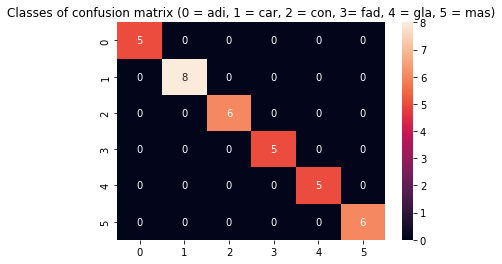

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d').set_title('Classes of confusion matrix (0 = adi, 1 = car, 2 = con, 3= fad, 4 = gla, 5 = mas)')

print(classification_report(y_test,predictions))

In [42]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)

In [43]:
accuracy

1.0

perfect score. 